In [2]:
import pandas as pd
import numpy as np

#plots library

import matplotlib.pyplot as plt
import seaborn as sns

# import linear models library

# statmodels: libreria para econometría 

import statsmodels.api as sm  # se especifica el modelo: y (vector), X (dataframe)
import statsmodels.formula.api as smf # se especifica el modelo como formula" y ~ x1 + x2 + x3"
import patsy  # matrix model de R 

- <a href='#1.0'> 1.0 Linear regression, Table and Coefplot  </a>
- <a href='#1.1'> 1.1 Linear Regression  </a>
- <a href='#1.2'> 1.2 Table rgeression  </a>
- <a href='#1.3'> 1.3 Coefplot  </a>


In [3]:
#!pip install statsmodels

# instalar stsatmodels 

### <a id='1.0'> 1.0 Linear regression, Table and Coefplot  </a> 

In [4]:
data = pd.read_stata(r"../../data/Pesos/peso.dta")

In [5]:
data

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109.0,12.0,12.0,1.0,1.0,1.0,0.0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133.0,6.0,12.0,2.0,1.0,0.0,0.0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129.0,NaN,12.0,2.0,0.0,0.0,0.0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126.0,12.0,12.0,2.0,1.0,0.0,0.0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134.0,14.0,12.0,2.0,1.0,1.0,0.0,4.897840,8.3750,0.0,3.314186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,27.5,30.0,138.300003,110.0,12.0,12.0,4.0,1.0,1.0,0.0,4.700480,6.8750,0.0,3.314186
1384,5.5,30.0,138.300003,146.0,NaN,16.0,2.0,1.0,1.0,0.0,4.983607,9.1250,0.0,1.704748
1385,65.0,8.0,118.599998,135.0,18.0,16.0,2.0,0.0,1.0,0.0,4.905275,8.4375,0.0,4.174387
1386,27.5,8.0,118.599998,118.0,NaN,14.0,2.0,0.0,1.0,0.0,4.770685,7.3750,0.0,3.314186


In [6]:
# Dummy variable 

data['Dummy'] =  np.where(data['cigs'] > 0 , 1, 0)

### <a id='1.1'> 1.1 Linear Regression </a> 

In [7]:
smf.ols('lbwght ~ Dummy', data).fit(cov_type = 'HC1')  # HC0: white , HC1: Hubert - White "reg y x1 x2 , robust"

# Plot tabla de resultado 

model1 = smf.ols('lbwght ~ Dummy', data).fit(cov_type = 'HC1').summary()
print(model1)

                            OLS Regression Results                            
Dep. Variable:                 lbwght   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     31.28
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.68e-08
Time:                        20:50:44   Log-Likelihood:                 346.06
No. Observations:                1388   AIC:                            -688.1
Df Residuals:                    1386   BIC:                            -677.7
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7718      0.006    862.764      0.0

In [13]:
smf.ols('lbwght ~ Dummy', data).fit(cov_type = 'HC1').summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.020    
Dependent Variable: lbwght           AIC:                -688.1217
Date:               2023-06-06 20:54 BIC:                -677.6504
No. Observations:   1388             Log-Likelihood:     346.06   
Df Model:           1                F-statistic:        31.28    
Df Residuals:       1386             Prob (F-statistic): 2.68e-08 
R-squared:          0.021            Scale:              0.035612 
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      4.7718    0.0055  862.7643  0.0000   4.7609   4.7826
Dummy         -0.0769    0.0138   -5.5931  0.0000  -0.1039  -0.0500
------------------------------------------------------------------
Omnibus:              611.550      Durbin-Watson:         1.928   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      5930.961
Skew:                 -1.791       Prob(JB):              0.000   
Kurtosis:             12.472       Condition No.:         3       
==================================================================

"""

In [14]:
smf.ols('lbwght ~ Dummy', data).fit(cov_type = 'HC1').summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,4.771778,0.005531,862.764316,0.000000e+00,4.760938,4.782619
Dummy,-0.076913,0.013751,-5.593088,2.230664e-08,-0.103865,-0.049960


In [15]:
smf.ols('lbwght ~ Dummy', data).fit(cov_type = 'HC1').summary2().tables[2]

,0,1,2,3
0,Omnibus:,611.550,Durbin-Watson:,1.928
1,Prob(Omnibus):,0.000,Jarque-Bera (JB):,5930.961
2,Skew:,-1.791,Prob(JB):,0.000
3,Kurtosis:,12.472,Condition No.:,3


### <a id='1.2'> 1.2 Table rgeression </a> 

In [20]:
# First Model

model1 = smf.ols('lbwght ~ Dummy', data).fit(cov_type = 'HC1').summary2().tables[1]
model1_coef = model1.iloc[1,0]  # fila posición 1 y columan posición 0
model1_coef_se = model1.iloc[1,1] # fila posición 1 y columan posición 1

# HC1: standar error robust aginst heterocedasticity

model1_lower = model1.iloc[1,4]
model1_upper = model1.iloc[1,5]

In [21]:
# Second Model

model2 = smf.ols('lbwght ~ Dummy + motheduc', data).fit(cov_type = 'HC1').summary2().tables[1]
model2_coef = model2.iloc[1,0]
model2_coef_se = model2.iloc[1,1]

model2_lower = model2.iloc[1,4]
model2_upper = model2.iloc[1,5]


# Third Model

model3 = smf.ols('lbwght ~ Dummy + motheduc + lfaminc + white', data).fit(cov_type = 'HC1').summary2().tables[1]

model3_coef = model3.iloc[1,0]
model3_coef_se = model3.iloc[1,1]

model3_lower = model3.iloc[1,4]
model3_upper = model3.iloc[1,5]

In [22]:
table = np.zeros( ( 3, 4 ) )  # creación de tablas vacías

# completamos la información de coeficiente estimado e intervalo de confianza

table[0,0] = model1_coef
table[0,1] = model1_coef_se 
table[0,2] = model1_lower
table[0,3] = model1_upper 

table[1,0] = model2_coef
table[1,1] = model2_coef_se  
table[1,2] = model2_lower
table[1,3] = model2_upper 

table[2,0] = model3_coef
table[2,1] = model3_coef_se  
table[2,2] = model3_lower
table[2,3] = model3_upper 

# dataframe 

table_pandas = pd.DataFrame( table, columns = [ "Estimate","Std. Error","Lower_bound" , "Upper_bound"])
table_pandas.index = [ "OLS baseline","OLS with controls", "OLS with controls II"]

table_pandas.reset_index(inplace = True)
table_pandas.rename(columns = {"index" : "Model"}, inplace = True)

table_pandas.round(8)

,Model,Estimate,Std. Error,Lower_bound,Upper_bound
0,OLS baseline,-0.076913,0.013751,-0.103865,-0.049960
1,OLS with controls,-0.073028,0.014156,-0.100773,-0.045284
2,OLS with controls II,-0.073093,0.014110,-0.100748,-0.045438


### <a id='1.3'> 1.3 Coefplot </a> 

In [23]:
# configuramos el formato de imagen (no marco cudarado o lineas verticuales u horizontales en la imagen)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)  # theme de fondo blanco 

Text(0.5, 1.0, 'Smoking Coefficient (95% CI)')

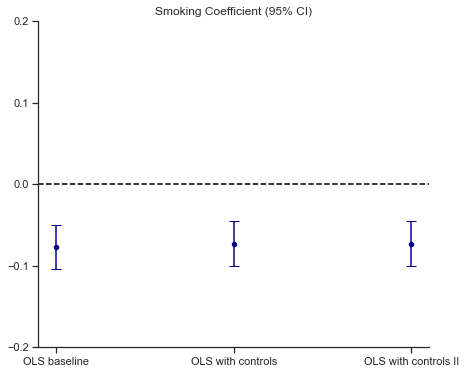

In [41]:
fig, ax = plt.subplots(figsize=(7, 6))

# scatter plot ( para los points . coeficciente)

ax.scatter(x=table_pandas['Model'], 
         marker='o', s=20,  # s: modificar tamaño del point
         y=table_pandas['Estimate'], color = "darkblue")

# errorbar para graficar el itervalo de confianza 

eb1 = plt.errorbar(x=table_pandas['Model'], y=table_pandas['Estimate'],
            yerr = 0.5*(table_pandas['Upper_bound']- table_pandas['Lower_bound']),
            color = 'darkblue', ls='', capsize = 5)

# yerr: distancia del punto (coeficeinte) a los extremo del intervalo (la mitad de la diferencia del upper vs lower bound)
# capsize: longitud de las barras del intervalo

# ls='': no une los puntos rojos 
#  yerr genera el gráfico del intervalo de confianza 

plt.axhline(y=0, color = 'black').set_linestyle('--')  # linea horizontal 
ax.set_yticks([-0.2,-0.1,0, 0.1,0.2])

# Set title & labels
plt.title('Smoking Coefficient (95% CI)',fontsize=12)



## Model Matrix

In [36]:
formula_basic = " lbwght ~ -1 + Dummy:(motheduc + lfaminc + white)"

In [37]:
y, X = patsy.dmatrices(formula_basic, data, return_type='dataframe') # formula to dataframe variables

# pasty.dmatrice( formula, data, formato de resultado )
# pasty me entregue vector y, dataframe de X en una tuple (y, X)

In [38]:
y

,lbwght
0,4.691348
1,4.890349
2,4.859812
3,4.836282
4,4.897840
...,...
1383,4.700480
1384,4.983607
1385,4.905275
1386,4.770685


In [39]:
X

,Dummy:motheduc,Dummy:lfaminc,Dummy:white
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,-0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1383,0.0,0.0,0.0
1384,0.0,0.0,0.0
1385,0.0,0.0,0.0
1386,0.0,0.0,0.0


In [35]:
# Accediendo al vecto y y dataframe X por separado

X = patsy.dmatrices(formula_basic, data, return_type='dataframe')[1]
X

,Dummy:motheduc,Dummy:lfaminc,Dummy:white
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,-0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1383,0.0,0.0,0.0
1384,0.0,0.0,0.0
1385,0.0,0.0,0.0
1386,0.0,0.0,0.0


In [34]:
y = patsy.dmatrices(formula_basic, data, return_type='dataframe')[0]
y

,lbwght
0,4.691348
1,4.890349
2,4.859812
3,4.836282
4,4.897840
...,...
1383,4.700480
1384,4.983607
1385,4.905275
1386,4.770685
